<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ams182/blob/main/Reto%20pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests, zipfile
from io import BytesIO
import pandas as pd
import numpy as np
import seaborn as sns

Cargando la base


In [2]:
# online

url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df_sub=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')

#local

#ubicación = 'C:/Users/AMUNGUIA/Desktop/pia/actividades/bases/agua.csv'
#df_sub=pd.read_csv(ubicacion, encoding = 'latin1')

df_sub.drop('SDT_mg/L', axis=1, inplace=True)
df_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [3]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1066 non-null   object 
 15  CALIDAD_SDT_ra       

In [4]:
df_sub.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

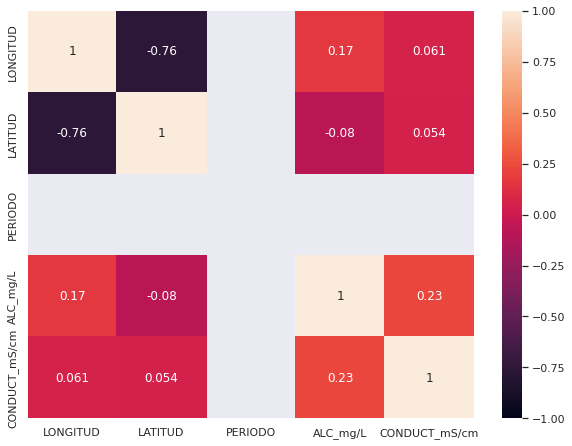

In [5]:
df_sub.corr()

sns.set(rc = {'figure.figsize':(10,7.5)})
sns.heatmap(df_sub.corr(), vmin = -1, vmax = 1,  annot= True)

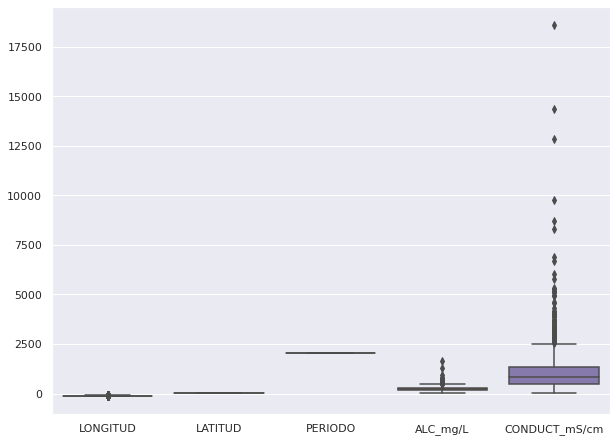

In [6]:
sns.set(rc = {'figure.figsize':(10,7.5)})
sns.boxplot( data=df_sub)

# According to series skew method the data is highly skewed so is better to use median than mean


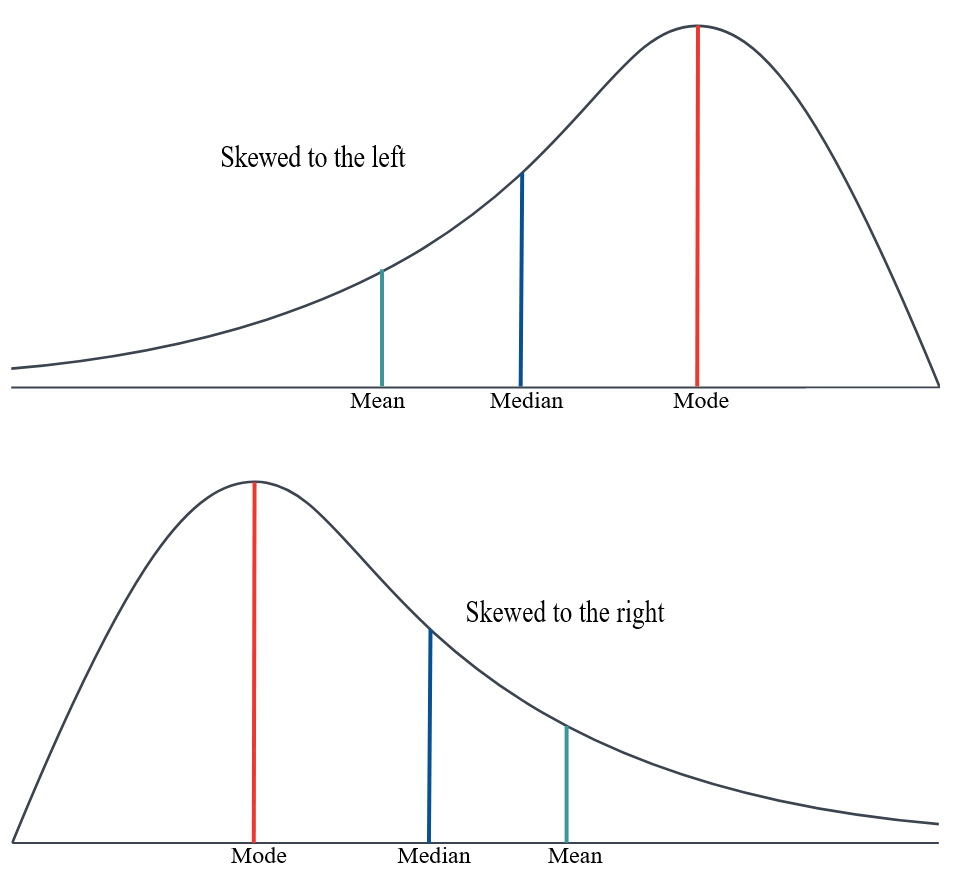

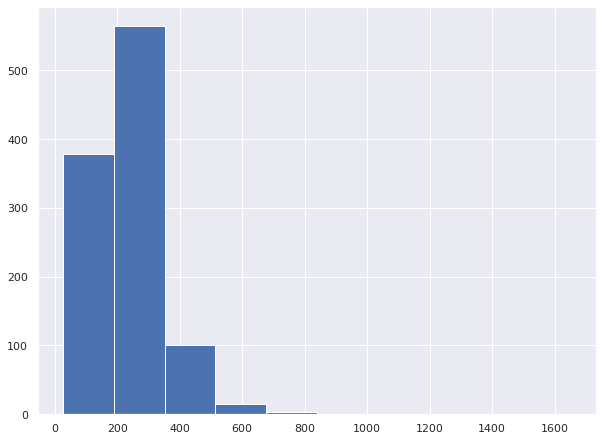

In [7]:
(df_sub['ALC_mg/L']).hist()

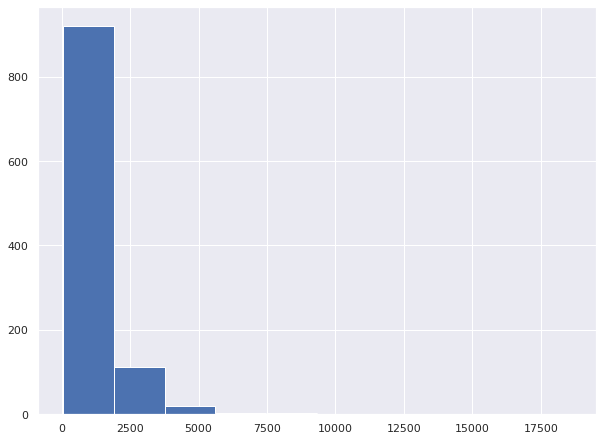

In [8]:
(df_sub['CONDUCT_mS/cm']).hist()

In [9]:
# Columnas relacionadas con la calidad del agua
print('COLUMNAS NUMERICAS\n')

columnas_n = ['ALC_mg/L','CONDUCT_mS/cm']

for columna in columnas_n:
  s = df_sub[columna].skew()
  if s < 3:
    df_sub[columna].fillna(df_sub[columna].mean(),inplace = True)
    print('para: ' + columna + ' con sesgo: ' + str(s) + ' se usó la media.')
  elif ((s > 3) & (s <9.99)):
    df_sub[columna].fillna(df_sub[columna].median(),inplace = True)
    print('para: ' + columna + ' con sesgo: ' + str(s) + 'se usó la mediana')
  elif (s > 10):
    df_sub[columna].fillna(df_sub[columna].mode(),inplace = True)
    print('para: ' + columna + ' con sesgo: ' + str(s) + 'se usó la moda')

columnas_c = ['CALIDAD_ALC', 'CALIDAD_CONDUC', 
              'SDT_M_mg/L','CALIDAD_SDT_ra', 'CALIDAD_SDT_salin','DUR_mg/L',
              'CALIDAD_DUR','N_NO3_mg/L','CALIDAD_N_NO3','CONTAMINANTES']

print('\n\n')
print('COLUMNAS CATEGORICAS\n')
for columna in columnas_c:
  df_sub[columna].fillna(df_sub[columna].mode()[0], inplace = True)   
  print('Hay Nan en ' + columna + '  ' + str(df_sub[columna].isnull().any())) 

COLUMNAS NUMERICAS

para: ALC_mg/L con sesgo: 3.2912871304696463se usó la mediana
para: CONDUCT_mS/cm con sesgo: 6.001355928959924se usó la mediana



COLUMNAS CATEGORICAS

Hay Nan en CALIDAD_ALC  False
Hay Nan en CALIDAD_CONDUC  False
Hay Nan en SDT_M_mg/L  False
Hay Nan en CALIDAD_SDT_ra  False
Hay Nan en CALIDAD_SDT_salin  False
Hay Nan en DUR_mg/L  False
Hay Nan en CALIDAD_DUR  False
Hay Nan en N_NO3_mg/L  False
Hay Nan en CALIDAD_N_NO3  False
Hay Nan en CONTAMINANTES  False
